# Risky Business

Harold has been participating in some risky business. He recently became seriously involved in the cryptocurrency market and has seen some excellent returns. Harold's recent returns have him strutting around the office like he's the best trader. He even had the audacity to bet you $5 that his portfolio returns are better than yours.

Using standard deviation and sharpe ratios, do the following:

* Identify which cryptocurrencies have the greatest risk-to-reward ratio.

* Determine which portfolio (yours or Harold's) has made the smartest investments.

* Identify which cryptocurrencies have the greatest Sharpe ratios (risk/reward).

## Instructions

### Import the Required Libraries

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

%matplotlib inline

### Read in data

In [2]:
# Set the path of the CSV files
harold_portfolio_path = Path("../Resources/harold_portfolio.csv")
my_portfolio_path = Path("../Resources/my_portfolio.csv")

# Read in data
harold_portfolio = pd.read_csv(harold_portfolio_path, parse_dates=True, infer_datetime_format=True)
my_portfolio = pd.read_csv(my_portfolio_path, parse_dates=True, infer_datetime_format=True)

In [3]:
# Display sample data to explore column names and values
harold_portfolio.head()

,Date,BTC,BTT,DOGE,ETH,LTC,XRP,SOLVE,XLM,TRON,ZIL
0,2019-05-20,8118.39,0.001187,0.003041,261.09,95.06,0.398003,0.338667,0.135545,0.028509,0.017992
1,2019-05-19,8200.00,0.001056,0.003178,234.03,86.65,0.417700,0.300430,0.141485,0.029277,0.019170
2,2019-05-18,7262.40,0.000993,0.003005,244.59,89.88,0.372736,0.287630,0.128833,0.026823,0.017685
3,2019-05-17,7363.69,0.000957,0.002962,264.39,95.75,0.386193,0.259506,0.126562,0.027220,0.017892
4,2019-05-16,7878.96,0.000885,0.003168,249.00,102.26,0.419707,0.223316,0.137283,0.028857,0.018725


In [4]:
my_portfolio.head()

,Date,BTC,DOGE,ETH,LTC,XRP,XLM
0,2019-05-20,8200.00,0.003041,261.09,95.06,0.398003,0.135545
1,2019-05-19,7262.40,0.003178,234.03,86.65,0.417700,0.141485
2,2019-05-18,7363.69,0.003005,244.59,89.88,0.372736,0.128833
3,2019-05-17,7878.96,0.002962,264.39,95.75,0.386193,0.126562
4,2019-05-16,8203.32,0.003168,249.00,102.26,0.419707,0.137283


### Prepare the data

In [5]:
# Drop na
harold_portfolio = harold_portfolio.dropna().copy()
my_portfolio = my_portfolio.dropna().copy()

In [6]:
# Set Date as index
harold_portfolio = harold_portfolio.set_index("Date")
my_portfolio = my_portfolio.set_index("Date")

In [7]:
# Display sample data
harold_portfolio.head()

,BTC,BTT,DOGE,ETH,LTC,XRP,SOLVE,XLM,TRON,ZIL
Date,,,,,,,,,,
2019-05-20,8118.39,0.001187,0.003041,261.09,95.06,0.398003,0.338667,0.135545,0.028509,0.017992
2019-05-19,8200.00,0.001056,0.003178,234.03,86.65,0.417700,0.300430,0.141485,0.029277,0.019170
2019-05-18,7262.40,0.000993,0.003005,244.59,89.88,0.372736,0.287630,0.128833,0.026823,0.017685
2019-05-17,7363.69,0.000957,0.002962,264.39,95.75,0.386193,0.259506,0.126562,0.027220,0.017892
2019-05-16,7878.96,0.000885,0.003168,249.00,102.26,0.419707,0.223316,0.137283,0.028857,0.018725


In [8]:
my_portfolio.head()

,BTC,DOGE,ETH,LTC,XRP,XLM
Date,,,,,,
2019-05-20,8200.00,0.003041,261.09,95.06,0.398003,0.135545
2019-05-19,7262.40,0.003178,234.03,86.65,0.417700,0.141485
2019-05-18,7363.69,0.003005,244.59,89.88,0.372736,0.128833
2019-05-17,7878.96,0.002962,264.39,95.75,0.386193,0.126562
2019-05-16,8203.32,0.003168,249.00,102.26,0.419707,0.137283


### Calculate daily returns 

In [9]:
# Calculate daily returns for each portfolio
harold_returns = harold_portfolio.pct_change().dropna().copy()
my_returns = my_portfolio.pct_change().dropna().copy()

In [10]:
# Display sample data
harold_returns.head()

,BTC,BTT,DOGE,ETH,LTC,XRP,SOLVE,XLM,TRON,ZIL
Date,,,,,,,,,,
2019-05-19,0.010052,-0.110362,0.045051,-0.103642,-0.088470,0.049490,-0.112904,0.043823,0.026939,0.065474
2019-05-18,-0.114341,-0.059659,-0.054437,0.045122,0.037276,-0.107647,-0.042606,-0.089423,-0.083820,-0.077465
2019-05-17,0.013947,-0.036254,-0.014309,0.080952,0.065309,0.036103,-0.097778,-0.017627,0.014801,0.011705
2019-05-16,0.069974,-0.075235,0.069548,-0.058209,0.067990,0.086780,-0.139457,0.084709,0.060140,0.046557
2019-05-15,0.041168,-0.037288,0.044192,-0.126747,-0.103364,0.086484,0.007420,-0.002047,0.086322,0.088224


In [11]:
my_returns.head()

,BTC,DOGE,ETH,LTC,XRP,XLM
Date,,,,,,
2019-05-19,-0.114341,0.045051,-0.103642,-0.088470,0.049490,0.043823
2019-05-18,0.013947,-0.054437,0.045122,0.037276,-0.107647,-0.089423
2019-05-17,0.069974,-0.014309,0.080952,0.065309,0.036103,-0.017627
2019-05-16,0.041168,0.069548,-0.058209,0.067990,0.086780,0.084709
2019-05-15,-0.025892,0.044192,-0.126747,-0.103364,0.086484,-0.002047


### `Concat` portfolios into one DataFrame

In [12]:
# Concat returns DataFrames
all_returns = pd.concat([harold_returns,my_returns], axis="columns", join="inner")
all_returns.head()

,BTC,BTT,DOGE,ETH,LTC,XRP,SOLVE,XLM,TRON,ZIL,BTC,DOGE,ETH,LTC,XRP,XLM
Date,,,,,,,,,,,,,,,,
2019-05-19,0.010052,-0.110362,0.045051,-0.103642,-0.088470,0.049490,-0.112904,0.043823,0.026939,0.065474,-0.114341,0.045051,-0.103642,-0.088470,0.049490,0.043823
2019-05-18,-0.114341,-0.059659,-0.054437,0.045122,0.037276,-0.107647,-0.042606,-0.089423,-0.083820,-0.077465,0.013947,-0.054437,0.045122,0.037276,-0.107647,-0.089423
2019-05-17,0.013947,-0.036254,-0.014309,0.080952,0.065309,0.036103,-0.097778,-0.017627,0.014801,0.011705,0.069974,-0.014309,0.080952,0.065309,0.036103,-0.017627
2019-05-16,0.069974,-0.075235,0.069548,-0.058209,0.067990,0.086780,-0.139457,0.084709,0.060140,0.046557,0.041168,0.069548,-0.058209,0.067990,0.086780,0.084709
2019-05-15,0.041168,-0.037288,0.044192,-0.126747,-0.103364,0.086484,0.007420,-0.002047,0.086322,0.088224,-0.025892,0.044192,-0.126747,-0.103364,0.086484,-0.002047


### Calculate `std dev` for all data

In [13]:
# Calculate std dev
all_portfolio_std = all_returns.std()
all_portfolio_std.head()

BTC     0.070488
BTT     0.030731
DOGE    0.050907
ETH     0.091517
LTC     0.084703
dtype: float64

### Calculate `sharpe ratio` for all data

In [14]:
# Calculate sharpe ratio
sharpe_ratios = (all_returns.mean() * 252) / (all_portfolio_std * np.sqrt(252))
sharpe_ratios.head()

BTC      0.936891
BTT    -32.935733
DOGE     5.615811
ETH     -5.638309
LTC     -0.796855
dtype: float64

### Plot Sharpe Ratios

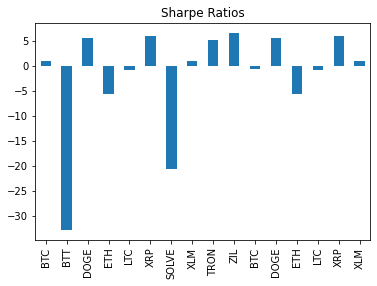

In [15]:
# Plot sharpe ratios using a bar chart
sharpe_ratios.plot.bar(title="Sharpe Ratios")

### How many smart investments did Harold make compared to risky investments? How many did you make?

**Sample Answer:** Out of his 10 investments, Harold made 6 good investments. Out of the your 6 investments, 3 of them were smart investments.

### Which three cryptos were the smartest investments?

**Sample Answer:** ZIL, XRP and DOGE have been the smartest crypto investments.

### Challenge

Calculate the Sharpe ratio for your entire portfolio. Then, use a comparison operator to see which portfolio has the greatest risk-to-reward ratio.

### Calculate annualized standard deviaton for each portfolio individually

In [16]:
# Calculate standard deviaton for all investments for each portfolio
harold_std_annual = harold_returns.std() * np.sqrt(252)
my_std_annual = my_returns.std() * np.sqrt(252)

In [17]:
# Print Harold's annual standard deviation
harold_std_annual

BTC      1.118962
BTT      0.487842
DOGE     0.808117
ETH      1.452783
LTC      1.344613
XRP      1.274365
SOLVE    0.936847
XLM      1.044947
TRON     1.030614
ZIL      1.027496
dtype: float64

In [18]:
# Print my annual standard deviation
my_std_annual

BTC     0.672712
DOGE    1.118621
ETH     0.937257
LTC     0.995635
XRP     1.229463
XLM     1.336267
dtype: float64

### Calculate the sharpe ratios for each individual portfolio

In [19]:
# Calculate sharpe ratios
harold_sharpe_ratios = (harold_returns.mean() * 252) / (harold_std_annual)
my_sharpe_ratios = (my_returns.mean() * 252) / (my_std_annual)

In [20]:
# Print Harold's sharpe ratios
harold_sharpe_ratios

BTC       0.936891
BTT     -32.935733
DOGE      5.615811
ETH      -5.638309
LTC      -0.796855
XRP       5.980254
SOLVE   -20.729548
XLM       0.937406
TRON      5.104548
ZIL       6.597156
dtype: float64

In [21]:
# Print my sharpe ratios
my_sharpe_ratios

BTC    -0.666636
DOGE   -0.020114
ETH    -0.389330
LTC    -0.285959
XRP    -0.212338
XLM    -0.092516
dtype: float64

### Average sharpe ratios for each portfolio and output to screen

In [22]:
# Averaging sharpe ratios
harold_sharpe_avg = harold_sharpe_ratios.mean()
my_sharpe_avg = my_sharpe_ratios.mean()

# Display results
print("Harold's sharpe ratio average:", harold_sharpe_avg)
print("My sharpe ratio average:", my_sharpe_avg)

Harold's sharpe ratio average: -3.4928380351166615
My sharpe ratio average: -0.27781543864562924


### Compare Sharpe Ratios Averages

In [23]:
# Determine if Harold's average is greater
# HINT: Use a comparison operator like so: harold_sharpe_avg > my_sharpe_avg
harold_sharpe_avg > my_sharpe_avg

False

### Which portfolio is the smartest investment, based on risk to reward ratio?

**Sample Answer:** My portfolio is the smartest! Harold owes me 5 dollars.